# Spaceship Titanic : A Machine Learning Project

# By Hana Shah

# 1. Introduction

This is a machine learning project which focuses on a passengers dataset to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly using supervised machine learning models. The performance of the ML models are compared. This project uses several Python libraries such as:

- Pandas (for Data Acquisition)
- Numpy 
- MatPlotlib & Seaborn (for Data Visualization)
- sklearn (for Model Building, Cross Validation, Model Evaluation)

# Table Of Contents

1. [Introduction](#intro)
2. [Data Acquisition](#2-data-acquisition)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
4. [Feature Engineering](#4-feature-engineering)
5. [Data Cleaning](#5-data-cleaning)
6. [Model Training & Validation](#6-model-training--validation)
7. [Model Prediction](#7-model-prediction)
8. [Hyperparameter Tuning](#8-hyperparameter-tuning)
9. [Conclusion](#9-conclusion)

# 2. Data Acquisition
Before starting any ML project, we need to understand the data first. Understand what each variable represents. Ask yourself
"What does this column represent? What does this data point mean? Is there any documentation or a data dictionary available?". 

We also need to analyze the data to see: "Is there a relationship between these variables? Are there any issues that require cleaning? Can we calculate correlations or associations between them? Could we use charts to clarify the dataset structure? Do we fully understand what each column represents?" It’s far worse to proceed with analysis without knowing what a variable means than to pause and seek clarification from the data source.

#### Dataset Description
The dataset is a set of personal records recovered from the ship's damaged computer system. Two-thirds (~8700) of the records are used as training data while the remaining (~4300) is used as test data. The attributes of the dataset are as below:
| Attribute       | Description                                                                                                      |
|-----------------|------------------------------------------------------------------------------------------------------------------|
| **PassengerId** | A unique Id for each passenger in the format `gggg_pp`, where `gggg` indicates a group and `pp` their number within the group. |
| **HomePlanet**  | The planet the passenger departed from, typically their planet of permanent residence.                           |
| **CryoSleep**   | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.      |
| **Cabin**       | The cabin number where the passenger is staying, formatted as `deck/num/side`, with side as P (Port) or S (Starboard). |
| **Destination** | The planet the passenger will be debarking to.                                                                  |
| **Age**         | The age of the passenger.                                                                                       |
| **VIP**         | Indicates whether the passenger has paid for special VIP service during the voyage.                             |
| **RoomService** | Amount billed by the passenger for room service amenities.                                                     |
| **FoodCourt**   | Amount billed by the passenger at the food court.                                                               |
| **ShoppingMall**| Amount billed by the passenger at the shopping mall.                                                           |
| **Spa**         | Amount billed by the passenger for spa services.                                                               |
| **VRDeck**      | Amount billed by the passenger for VR deck amenities.                                                          |
| **Name**        | The first and last names of the passenger.                                                                     |
| **Transported** | Indicates whether the passenger was transported to another dimension. This is the target variable for prediction. |

Based on the column descriptions, we can split the PassengerId and Cabin columns into multiple distinct columns to extract more detailed information. We will do this in the feature engineering section.

#### Importing Libraries
Importing all libraries needed. More libraries will be imported if required.

In [221]:
# import the standard modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [222]:
# create dictionary for categorical columns
space_dtypes = {"VIP": "category", "CryoSleep": "category", "HomePlanet": "category", "Destination": "category"} 

# reading the files
space_train = pd.read_csv("C:/Users/Hana/Documents/Data Science/DS Projects/spaceship-titanic/train.csv", dtype=space_dtypes)
space_test = pd.read_csv("C:/Users/Hana/Documents/Data Science/DS Projects/spaceship-titanic/test.csv", dtype=space_dtypes)

# preview data
space_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Overview of testing data

In [223]:
# check datatype in each column
print("Training data column datatypes: ")
print(space_train.dtypes)

Training data column datatypes: 
PassengerId       object
HomePlanet      category
CryoSleep       category
Cabin             object
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name              object
Transported         bool
dtype: object


There are a total of five categorical features, two text features and six continuous features. For the categorical and text features, we need to encode the data into numerical type. This is because, almost all machine learning algorithms need to take input in numerical values.

In [224]:
# checking the number of rows and columns
print(f"Size of training data: {space_train.shape}")

Size of training data: (8693, 14)


In [225]:
# display the statistics of the numerical data
print("Summary statistics of numerical training data:")
space_train.describe().T

Summary statistics of numerical training data:


,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


When looking at the summary statistics, typically, we want to see if the mean and median are close, as this indicates a relatively balanced distribution. If there’s a large difference, it suggests the variable has a skewed distribution, which could impact further analysis. Here, we can see that RoomService, FoodCourt, ShoppingMall, Spa and VRDeck are highly skewed.

Note: If there’s a large gap between mean and median, it might indicate a data distribution issue or an outlier. A simple way to check for outlier is by examining the maximum value. If this value is far from the mean, it could indicate an outlier. The same goes for the minimum value.

In [226]:
# display the statistics of the non-numeric data
print("Summary statistics of categorical/text training data:")
space_train.describe(exclude=np.number).T

Summary statistics of categorical/text training data:


,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2
Transported,8693,2,True,4378


In [227]:
# display the information of the dataset
print("Information of training data:")
space_train.info()

Information of training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(4), float64(6), object(3)
memory usage: 654.3+ KB


In [228]:
# check for null values
print('Training data missing values:')
print(space_train.isna().mean() * 100)

Training data missing values:
PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


Almost all columns contain missing values. However, it constitutes less than 5% of the data.

In [229]:
# check duplicate values
space_train.duplicated().sum()

0

No duplicate values.

In [230]:
# check for outliers
def outlier_limits(df):
    # initialize dataframe
    outliers_df = pd.DataFrame(columns=['Column', 'Lower Limit', 'Upper Limit'])

    for column in df.select_dtypes(include=['number']).columns:
        # 75th percentile 
        seventy_fifth = df[column].quantile(0.75) 

        # 25th percentile 
        twenty_fifth = df[column].quantile(0.25)  

        # Interquartile range 
        space_iqr = seventy_fifth - twenty_fifth 

        # Upper threshold 
        upper = seventy_fifth + (1.5 * space_iqr) 
        # Lower threshold 
        lower = twenty_fifth - (1.5 * space_iqr) 

        # append row to dataframe
        outliers_df = outliers_df._append({
                'Column': column,
                'Lower Limit': lower,
                'Upper Limit': upper
            }, ignore_index=True)

    outliers_df = outliers_df.set_index('Column')    
    return outliers_df
    
outliers_train_df = outlier_limits(space_train)
outliers_train_df

,Lower Limit,Upper Limit
Column,,
Age,-9.5,66.5
RoomService,-70.5,117.5
FoodCourt,-114.0,190.0
ShoppingMall,-40.5,67.5
Spa,-88.5,147.5
VRDeck,-69.0,115.0


To find the outliers, first we need to find the upper and lower limits. Upper outlier are values above the upper limit which are values above the sum of the 75th percentile plus one-point-five times the IQR. Lower outliers are values below the upper limit which are values below the sum of the 25th percentile minus one-point-five times the IQR.

In [231]:
def check_outliers(df, outliers_df):
    # Iterate through each row in the limits DataFrame
    for column, row in outliers_df.iterrows():
        lower_limit = row['Lower Limit']
        upper_limit = row['Upper Limit']
        
        # Filter the original DataFrame to find outliers in the current column
        outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
        
        # Print the column name and the outliers
        print(f"Outliers in column '{column}':")
        print(outliers[[column]])
        print("\n" + "-"*40 + "\n")

check_outliers(space_train, outliers_train_df)

Outliers in column 'Age':
       Age
118   67.0
280   67.0
338   79.0
378   68.0
416   74.0
...    ...
7729  72.0
8042  67.0
8288  76.0
8369  73.0
8516  70.0

[77 rows x 1 columns]

----------------------------------------

Outliers in column 'RoomService':
      RoomService
4           303.0
13          719.0
16         1286.0
20          412.0
27          980.0
...           ...
8646        676.0
8661        699.0
8675       1030.0
8682        240.0
8692        126.0

[1861 rows x 1 columns]

----------------------------------------

Outliers in column 'FoodCourt':
      FoodCourt
2        3576.0
3        1283.0
5         483.0
6        1539.0
8         785.0
...         ...
8686     1146.0
8687     3208.0
8688     6819.0
8691     1049.0
8692     4688.0

[1823 rows x 1 columns]

----------------------------------------

Outliers in column 'ShoppingMall':
      ShoppingMall
3            371.0
4            151.0
11           589.0
12          1123.0
15           876.0
...            ..

Since we have the value thresholds, we can find the values outside of these limits (outliers) by subsetting our data. Since the output is very long, we will visualize the numerical columns using boxplot to see the outliers.

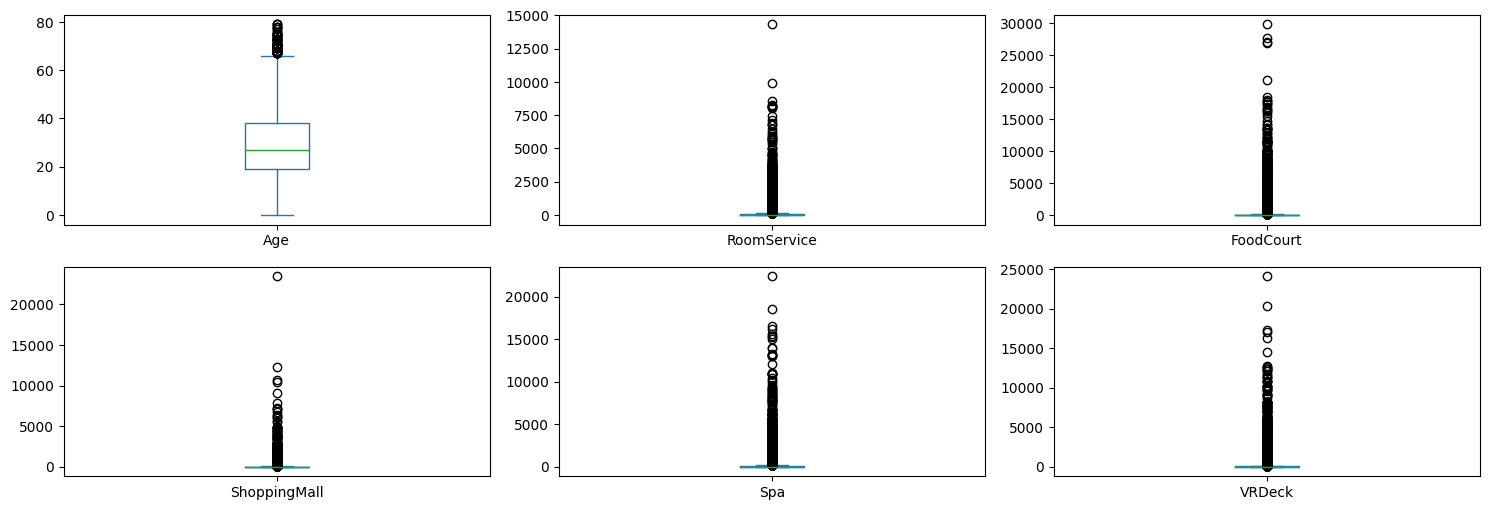

In [232]:
# display boxplots for all numerical columns in one figure for better visualization of outliers
space_train.select_dtypes(include=['number']).plot(kind='box', subplots=True, layout=(len(space_train.columns)//3, 3), figsize=(15, 10), sharey=False)
plt.tight_layout()
plt.show()

Age:
- The median age appears to be around 25-30 years. This means exactly half of the passengers are older/younger than this age.
- The IQR spans between 20-40 years, which means that 50% of the passengers are within this age range.
- The whiskers represent the thresholds (upper limit and lower limit), here we can see that there are numerous outliers going up to about 80 years. This is still within a realistic range for age so the outliers are not removed.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:
- All these columns refer to the passenger's usage metric (amount billed) respective to the luxury amenity.
- They all have very similar distributions, in which most values are concentrated near zero and many outliers. This shows a highly positively skewed distribution. This makes sense because monetary amounts are commonly encountered sources of skewed distributions in data science applications as they are often lognormally distributed. We need to apply log transformation to deal with the skewness.
- There's a fairly consistent pattern of outlier distribution across all the columns. The density of these outliers suggests these aren't just random occurrences but rather represent a distinct customer segment. It could be a wealthy passenger that spends significantly more compared to other passengers. Therefore, the outliers are not removed.

#### Overview of test data

In [233]:
# check datatype in each column
print("Test data column datatypes: ")
print(space_test.dtypes)

Test data column datatypes: 
PassengerId       object
HomePlanet      category
CryoSleep       category
Cabin             object
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name              object
dtype: object


Similarly to training data, the categorical and text features need to be encoded into numerical type to be suitable as input to the machine learning models.

In [234]:
# checking the number of rows and columns
print(f"Size of test data: {space_test.shape}")

Size of test data: (4277, 13)


In [235]:
# display the statistics of the numerical data
print("Summary statistics of numerical test data:")
space_test.describe().T

Summary statistics of numerical test data:


,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


In [236]:
# display the statistics of the categorical/text data
print("Summary statistics of categorical/text test data:")
space_test.describe(exclude=np.number).T

Summary statistics of categorical/text test data:


,count,unique,top,freq
PassengerId,4277,4277,0013_01,1
HomePlanet,4190,3,Earth,2263
CryoSleep,4184,2,False,2640
Cabin,4177,3265,G/160/P,8
Destination,4185,3,TRAPPIST-1e,2956
VIP,4184,2,False,4110
Name,4183,4176,Cints Erle,2


In [237]:
# display the information of the dataset
print("Information of test data:")
space_test.info()

Information of test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   object  
 1   HomePlanet    4190 non-null   category
 2   CryoSleep     4184 non-null   category
 3   Cabin         4177 non-null   object  
 4   Destination   4185 non-null   category
 5   Age           4186 non-null   float64 
 6   VIP           4184 non-null   category
 7   RoomService   4195 non-null   float64 
 8   FoodCourt     4171 non-null   float64 
 9   ShoppingMall  4179 non-null   float64 
 10  Spa           4176 non-null   float64 
 11  VRDeck        4197 non-null   float64 
 12  Name          4183 non-null   object  
dtypes: category(4), float64(6), object(3)
memory usage: 318.1+ KB


In [238]:
# check for null values
print('Test data missing values:')
print(space_test.isnull().mean() * 100)

Test data missing values:
PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64


Almost all columns contain missing values. However, it constitutes less than 5% of the data.

In [239]:
# check duplicate values
space_test.duplicated().sum()

0

No duplicate values.

In [240]:
# check for outliers
outliers_test_df = outlier_limits(space_test)
outliers_test_df

,Lower Limit,Upper Limit
Column,,
Age,-8.0,64.0
RoomService,-79.5,132.5
FoodCourt,-117.0,195.0
ShoppingMall,-49.5,82.5
Spa,-75.0,125.0
VRDeck,-54.0,90.0


In [241]:
check_outliers(space_test, outliers_test_df)

Outliers in column 'Age':
       Age
24    66.0
174   70.0
260   65.0
305   79.0
358   74.0
392   67.0
404   69.0
471   66.0
515   72.0
542   75.0
575   65.0
579   67.0
718   73.0
730   73.0
740   71.0
792   69.0
1008  70.0
1102  67.0
1114  75.0
1139  78.0
1180  71.0
1191  66.0
1314  69.0
1444  65.0
1445  73.0
1458  65.0
1562  67.0
1586  77.0
1706  69.0
1777  65.0
1816  66.0
1819  72.0
1832  68.0
1956  69.0
2051  73.0
2150  68.0
2220  74.0
2228  66.0
2237  67.0
2437  79.0
2538  65.0
2723  66.0
2741  69.0
2791  66.0
2890  66.0
2939  65.0
3084  66.0
3167  72.0
3366  65.0
3951  66.0
4022  65.0
4061  65.0
4138  73.0
4178  65.0

----------------------------------------

Outliers in column 'RoomService':
      RoomService
10          339.0
11          932.0
25         1784.0
26          293.0
31          598.0
...           ...
4250        640.0
4252        652.0
4257        882.0
4263       1272.0
4264        147.0

[902 rows x 1 columns]

----------------------------------------

Outliers 

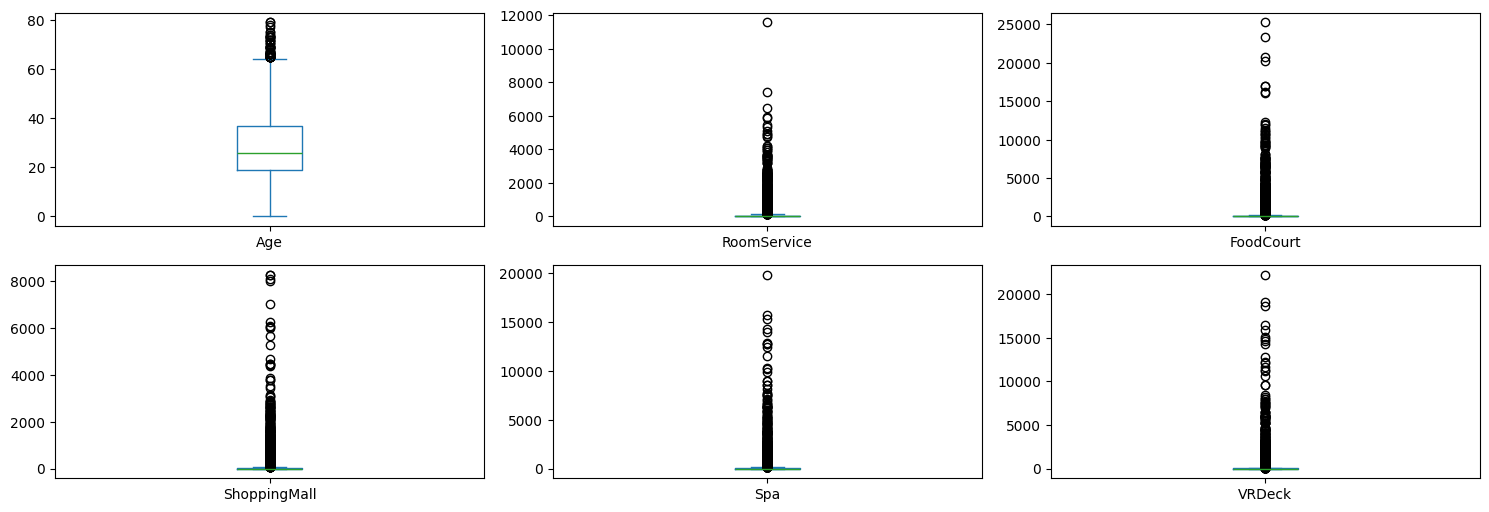

In [242]:
# display boxplots for all numerical columns in one figure for better visualization of outliers
space_test.select_dtypes(include=['number']).plot(kind='box', subplots=True, layout=(len(space_test.columns)//3, 3), figsize=(15, 10), sharey=False)
plt.tight_layout()
plt.show()

It shows a similar pattern as the training data. Therefore, the outliers are not removed.

Important! This phase involves analyzing, understanding the data, grasping the business problem, identifying the data source, and verifying if everything makes sense. Only after this can we proceed with the analysis process.

# 3. Exploratory Data Analysis

#### Exploring Categorical Variables

In [243]:
# check distribution of target variable
space_train['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

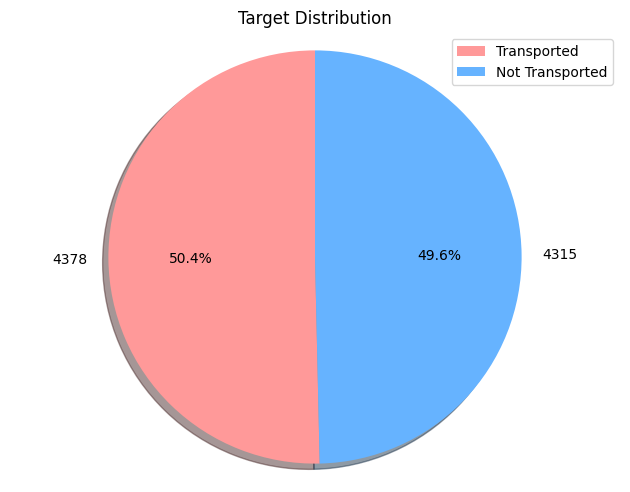

In [244]:
# display the distribution of the data
value = np.array(space_train['Transported'].value_counts())
sizes = np.array(space_train['Transported'].value_counts())
label = ["Transported", "Not Transported"]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Target Distribution')
plt.legend(label)
plt.show()

This is a binary classification problem as the target variable consists of two values. Moreover, the target variable is balanced as it is almost equally distributed. Half of the passengers was transported to another dimension.

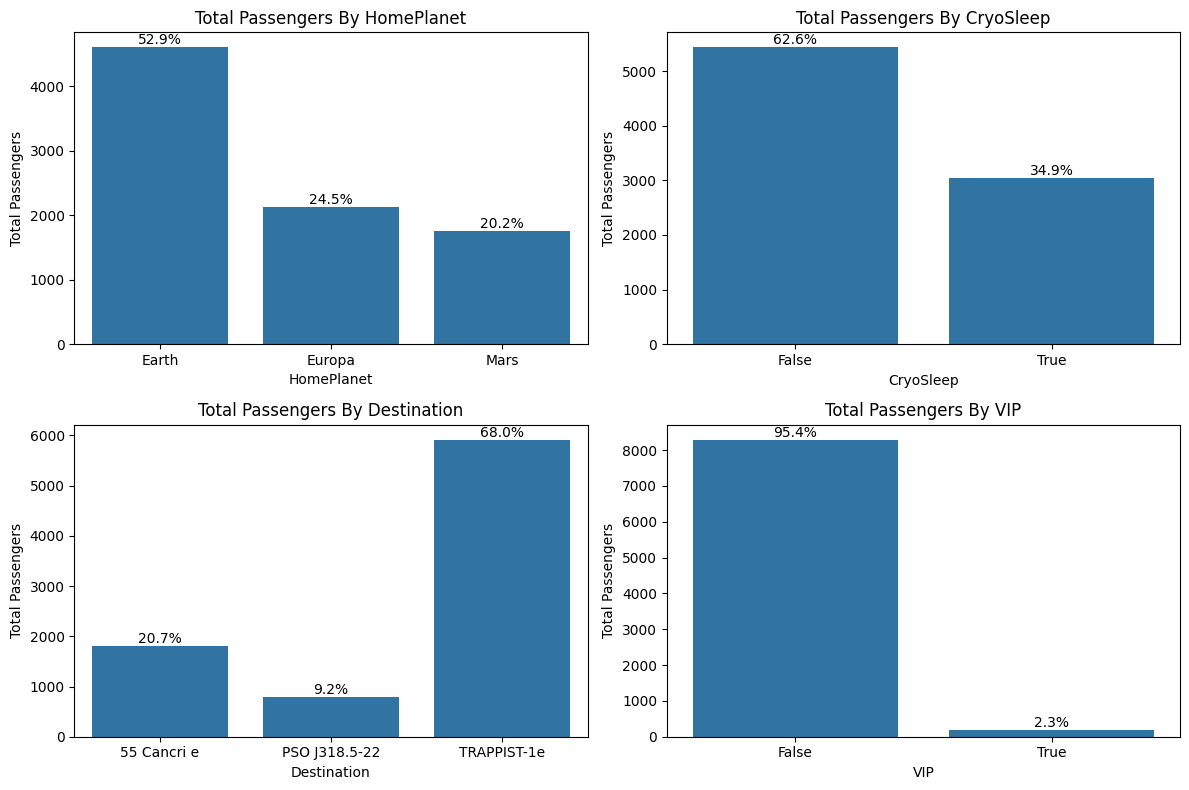

In [245]:
# display distribution of categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# list of features to plot
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# function to add percentages on top of bars
def add_percentage(ax):
    total = len(space_train)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate if height is greater than 0
            percentage = (height / total) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom')

# plot countplots for each feature
for feature, ax in zip(features, axes.ravel()):
    sns.countplot(data=space_train, x=feature, ax=ax)
    ax.set_title('Total Passengers By '+feature)
    ax.set_ylabel('Total Passengers')
    add_percentage(ax)

# adjust layout
plt.tight_layout()
plt.show()

- Half of passengers, accounting for 52.9%, are from Earth, followed by those from Europa and Mars.
- Around 63% of passengers were elected to be put into suspended animation for the duration of the voyage.   
- Majority of passengers, accounting for 68%, were headed towards TRAPPIST-1e.
- Almost all passengers did not pay for special VIP service during the voyage. 

Note: If there's a variable where hierarchy matters, then we can specify the hierarchy in the chart by setting the order of the bars using the order parameter. For ex: education level.

In [246]:
space_train.groupby(['HomePlanet'])['Age'].agg(['mean','median'])

,mean,median
HomePlanet,,
Earth,26.068232,23.0
Europa,34.419664,33.0
Mars,29.297203,28.0


Passengers from Europa have the highest median age, indicating a more mature demographic, followed by passengers from Mars and Earth, who show comparatively lower median ages.

In [247]:
group_planet = space_train.groupby(['HomePlanet','Destination'])['PassengerId'].count()

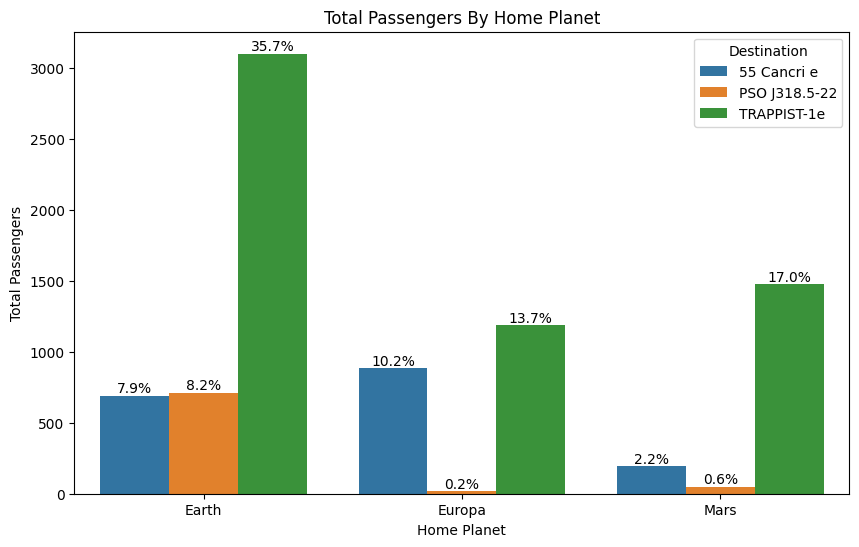

In [248]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=space_train, x='HomePlanet', hue='Destination')
add_percentage(ax)
plt.title('Total Passengers By Home Planet')
ax.set_xlabel('Home Planet')
ax.set_ylabel('Total Passengers')
plt.show()

Most passengers from all planets were heading to TRAPPIST-1e.

#### Exploring Numerical Variables

Text(0, 0.5, 'Total Passengers')

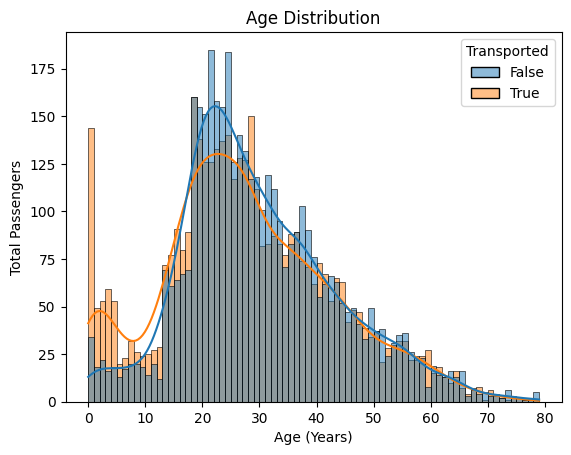

In [249]:
# display distribution of age
sns.histplot(data=space_train, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Total Passengers')

- 0-18 year olds were more likely to be transported.
- 18-25 year olds were less likely to be transported.
- Over 25 year olds were about equally likely to be transported.

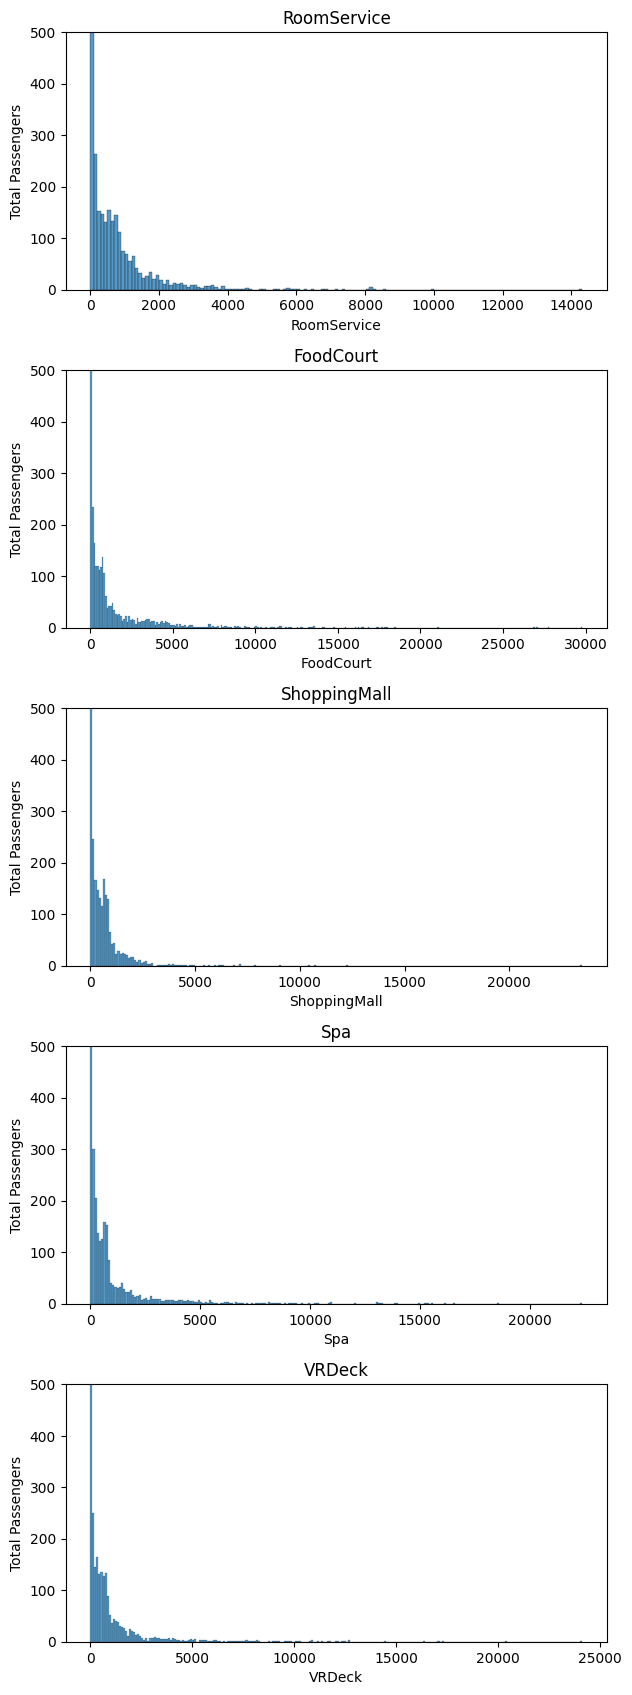

In [250]:
# display distribution of continuous features
fig = plt.figure(figsize=(12,20))

# list of features to plot
features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

# plot histogram for each feature
for i, col in enumerate(features):
    plt.subplot(6,2,2*i+1)
    sns.histplot(space_train[col], binwidth=100)
    plt.ylim([0,500])
    plt.ylabel('Total Passengers')
    plt.title(col)
    
# adjust layout
plt.tight_layout()
plt.show()

The dataset is very positively skewed. We need to correct the skew so that it is normally distributed. This is because many algorithms (like Linear Regression) assume data is normally distributed so when data is skewed, these algorithms perform poorly. To correct this, we implement one of the common transformation methods which is log-transformation.

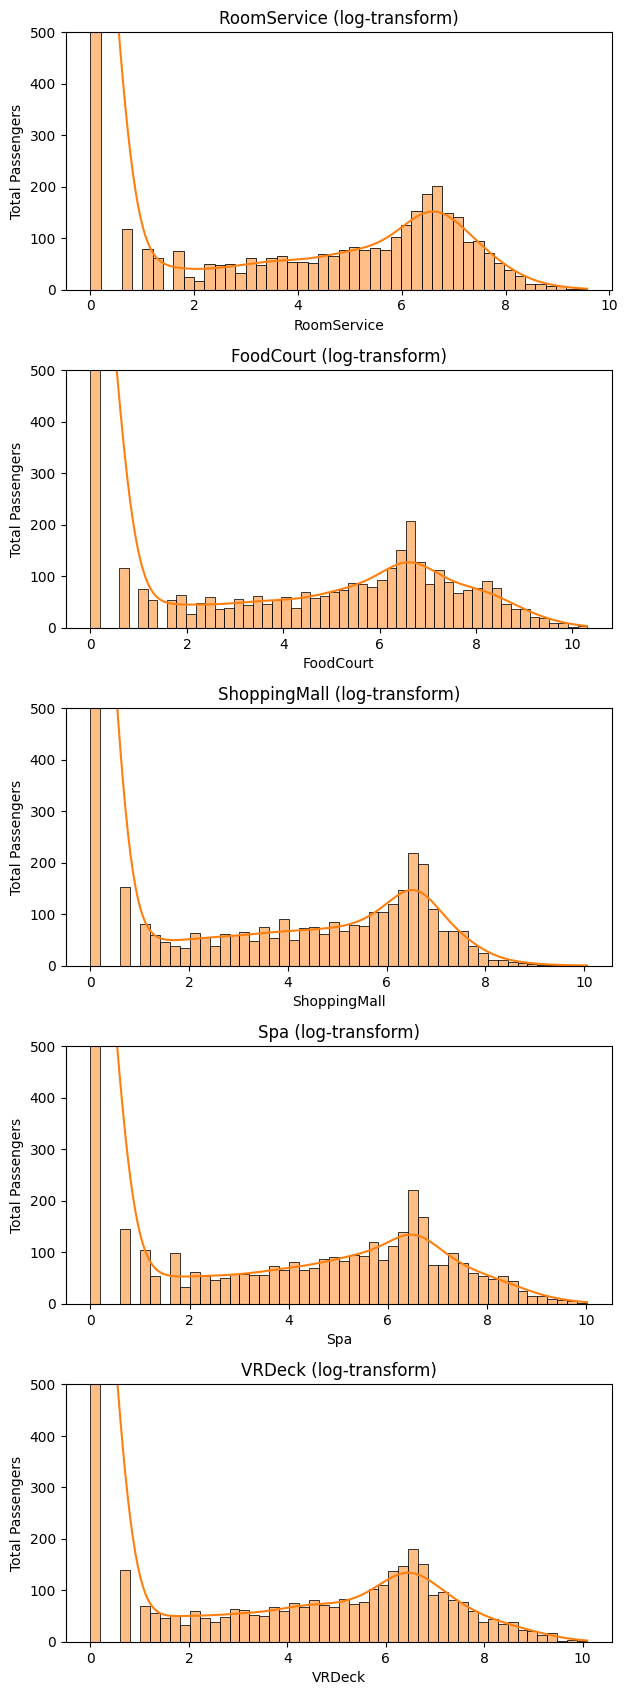

In [251]:
# display distribution of continuous features (log-transformed)
fig = plt.figure(figsize=(12,20))

# list of features to plot
features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

# plot histogram for each feature
for i, col in enumerate(features):
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+space_train[col]), color='C1', kde=True, binwidth=0.2)
    plt.ylim([0,500])
    plt.ylabel('Total Passengers')
    plt.title(f'{col} (log-transform)')
    
# adjust layout
plt.tight_layout()
plt.show()

The logarithm transform is used to decrease skew in distributions, especially with large outliers. It can make it easier for algorithms to 'learn' the correct relationships. Right now, the distribution is affected by the missing values. We will need to handle it.

#### Correlation Matrix of Quantitative Variables

I think one of the most important part of analysis is examining the relationship between variables as it can reveal a lot of insights. At this stage, it’s crucial to distinguish between quantitative and qualitative variables, as the analysis method varies accordingly.
- For quantitative variables, we use correlation.
- For qualitative variables, we study association.

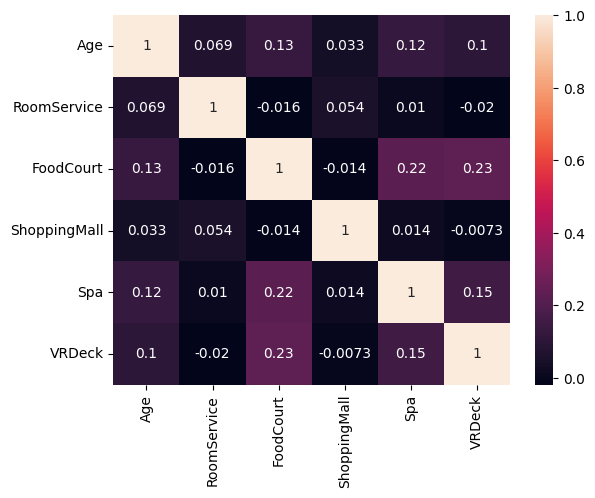

In [252]:
# select only numerical features
numeric_data = space_train.select_dtypes(include=['number'])

# check correlation of numerical features
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

There is no correlation between the numerical features.

#### Association Between Qualitative Variables - Contingency Table
To analyze relationships between qualitative variables, you cannot use Pearson correlation — which is the standard method for quantitative variables and what we used previously. This approach is unsuitable for qualitative variables. Instead, for qualitative variables, there are a few methods to analyze the relationships.
- Contingency Table: Essentially a crosstab — a table that shows the frequency, or count, of observations within each category for two variables.

In [253]:
contingency_table = pd.crosstab(space_train['HomePlanet'],space_train['Transported'])
contingency_table

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


This is an example of a contigency table. With the contingency table, we’re precisely exploring the relationship between categories within one variable and those within another. From this, we could calculate percentages, create summaries, or even dive into more detailed analyses to see which combination has the highest count. However, there’s an even better way to analyze this contingency table: by applying the Chi-squared test.

- Chi-squared Test: This test is used to check for independence between two categorical variables, which is essentially examining the relationship. Are these variables independent, meaning that the occurrence of one does not affect the other? Or is there some dependency between them? That’s what the Chi-Squared test aims to uncover.

In the contingency table, you might notice that it doesn’t provide highly meaningful insights — just raw counts. To conduct a more complex analysis, we can take this contingency table and apply a Chi-Squared test.

The Chi-Squared test is a statistical test, requiring us to define two hypotheses:

- H₀ (Null Hypothesis): There is no significant association between the two categorical variables in the dataset. In simpler terms, the variables are independent.
- H₁ (Alternative Hypothesis): The opposite of the null hypothesis, suggesting that there is a significant association between the variables, meaning they are not independent.

The purpose of the test is to validate a hypothesis, removing any guesswork. In data analysis, conclusions should be based on statistical testing, not assumptions. By applying a statistical test, we can draw objective, data-driven conclusions.

In this case, we’ll use the p-value from the test result to interpret our findings:

- If the p-value is less than the significance level (commonly 0.05), we can reject H₀, suggesting that the variables are not independent (considering H₁ instead).
- If the p-value is greater than the significance level, we cannot reject H₀, meaning the data does not support a significant association between the variables.

In [254]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"P-value from Chi-square test: {p}")

P-value from Chi-square test: 2.809059985251311e-71


We get a p-value of 2.81e-71. Based on the rule mentioned above, in this case, it is statistically significant and the H₀ is rejected. This likely suggests that the two variables are dependent of each other. 

Another approach to studying relationships between qualitative variables is: Cramer’s V coefficient, often represented by the letter V.
- Cramer's V coefficient: It measures the strength of association between two nominal variables, with values ranging from 0 (no association) to 1 (perfect association). It’s based on the chi² value.

If you review Cramer’s V definition, it measures the association strength between two variables, which is similar in concept to the correlation coefficient that measures the strength of correlation between quantitative variables. You would use the correlation coefficient when the variables are quantitative and Cramer’s V when they’re qualitative.

In [255]:
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Cramér's Coefficient V: {cramers_v:.4f}")

Cramér's Coefficient V: 0.1956


HomePlanet (rows) = 3 (Earth, Europa, Mars)
Transported (columns) = 2 (False, True)

degree of freedom (df) = (3 - 1) × (2 - 1) | df = 2 × 1 | df = 2

![CRAMER](cramer.png) 

A Cramer’s V of 0.1956 and degrees of freedom = 2 indicates a small to medium (or “moderate”) association between HomePlanet and Transported. However, the p-value is small. This leads me to thinking - isn't low p value and value of Cramer stats contradict each other? The answer is as below:

P-value:
- Tells us about statistical significance (whether the relationship exists)
- Extremely small value means there's very strong evidence against the null hypothesis
- Is heavily influenced by sample size
- Just tells us the relationship isn't due to chance

Cramér's V:
- Tells us about effect size (how strong the relationship is)
- Ranges from 0 to 1
- Not influenced by sample size
- 0.1956 indicates a relatively weak to moderate association

So, We CAN conclude that there is a relationship between HomePlanet and Transported status, but we should be careful about how we characterize this relationship. The p-value (2.81e-71) tells us the relationship is statistically significant, this means the differences we see aren't random chance. Although the relationship exists, it is modest in strength. This means that knowing someone's home planet gives you some information about their likelihood of being transported, but it's not a strong predictor. Other factors likely influence transported status too. (We can't use HomePlanet alone to make strong predictions about Transported status)

Think of it like this analogy:
- It's like saying "there's a relationship between a person's hometown and their favorite food"
- The relationship might be real (statistically significant) - maybe people from coastal cities eat more seafood
- But it's not strong (low Cramér's V) - you can't confidently predict someone's favorite food just from their hometown


# 4. Feature Engineering

Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning.

#### Age Category

In [256]:
# separate the ages into categories
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
space_train['AgeCategory'] = pd.cut(space_train['Age'], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=labels)
space_test['AgeCategory'] = pd.cut(space_test['Age'], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=labels)

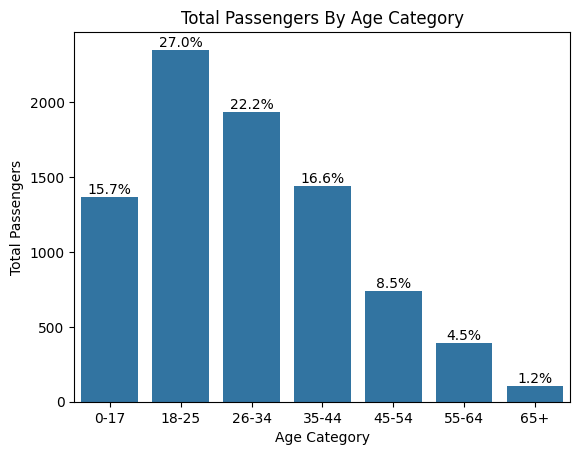

In [257]:
# display distribution of age category
ax = sns.countplot(data=space_train, x='AgeCategory')
add_percentage(ax)
plt.xlabel('Age Category')
plt.ylabel('Total Passengers')
plt.title('Total Passengers By Age Category')
plt.show()

Among all age categories, the 18-25 age range has the highest count of passengers, accounting for 27% of passengers.

#### Expenditure and NoSpending (Feature Extraction)

In [258]:
# calculate total expenditure and identify passengers with no expenditure
exp_features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

space_train['Expenditure']=space_train[exp_features].sum(axis=1)
space_train['NoSpending']=(space_train['Expenditure']==0).astype(int)
space_test['Expenditure']=space_test[exp_features].sum(axis=1)
space_test['NoSpending']=(space_test['Expenditure']==0).astype(int)

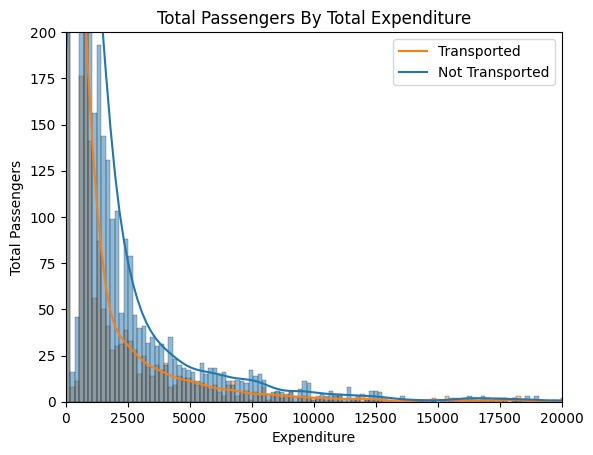

In [259]:
sns.histplot(data=space_train, x='Expenditure', hue='Transported', bins=200, kde=True)
plt.title('Total Passengers By Total Expenditure')
plt.ylim([0,200])
plt.xlim([0,20000])
plt.ylabel('Total Passengers')
plt.legend(["Transported", "Not Transported"])
plt.show()

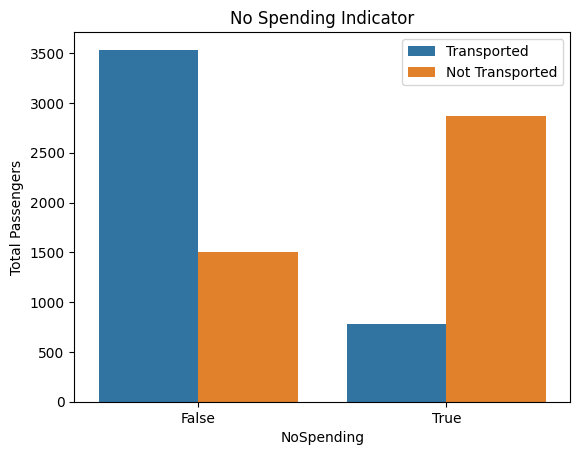

In [260]:
sns.countplot(data=space_train, x='NoSpending', hue='Transported')
plt.title('No Spending Indicator')
plt.ylabel('Total Passengers')
plt.legend(["Transported", "Not Transported"])
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

#### Cabin (Feature Extraction)

In [261]:
# Replace NaN's with outliers for now (so we can split feature)
space_train['Cabin'].fillna('Z/9999/Z', inplace=True)
space_test['Cabin'].fillna('Z/9999/Z', inplace=True)

# split the Cabin column into three new columns: deck, num, and side
space_train[['CabinDeck', 'CabinNum', 'CabinSide']] = space_train['Cabin'].str.split('/', expand=True)
space_test[['CabinDeck', 'CabinNum', 'CabinSide']] = space_test['Cabin'].str.split('/', expand=True)

# change data type of CabinNum to int
space_train['CabinNum'] = space_train['CabinNum'].astype(int)
space_test['CabinNum'] = space_test['CabinNum'].astype(int)

# Put Nan's back in (we will fill these later)
space_train.loc[space_train['CabinDeck']=='Z', 'CabinDeck']=np.nan
space_train.loc[space_train['CabinNum']==9999, 'CabinNum']=np.nan
space_train.loc[space_train['CabinSide']=='Z', 'CabinSide']=np.nan
space_test.loc[space_test['CabinDeck']=='Z', 'CabinDeck']=np.nan
space_test.loc[space_test['CabinNum']==9999, 'CabinNum']=np.nan
space_test.loc[space_test['CabinSide']=='Z', 'CabinSide']=np.nan

# Drop Cabin (we don't need it anymore)
space_train.drop('Cabin', axis=1, inplace=True)
space_test.drop('Cabin', axis=1, inplace=True)

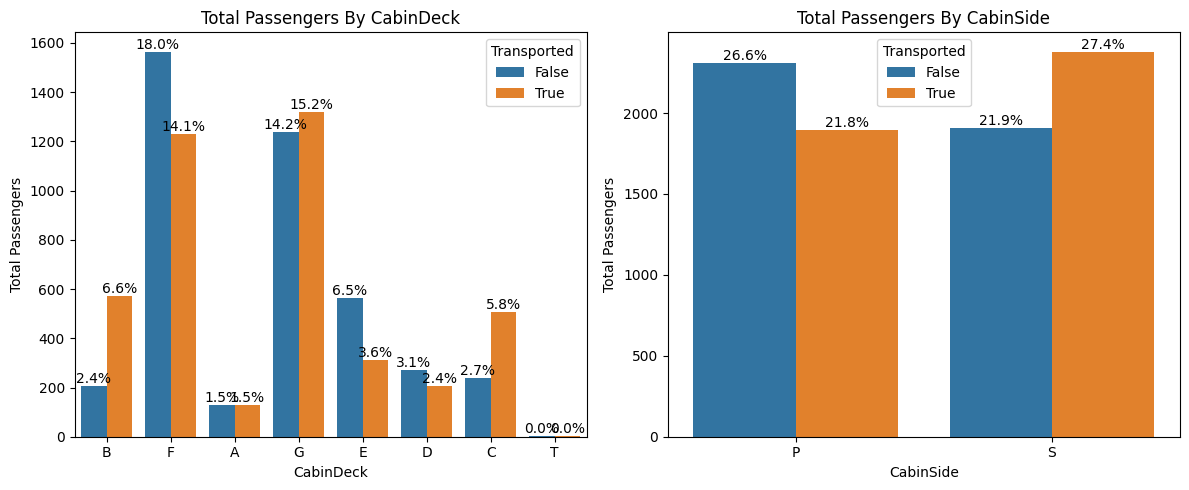

In [296]:
# display distribution of categorical features
fig, axes = plt.subplots(1, len(features), figsize=(12, 5))

# list of features to plot
features = ['CabinDeck', 'CabinSide']

# plot countplots for each feature
for feature, ax in zip(features, axes.ravel()):
    sns.countplot(data=space_train, x=feature, ax=ax, hue=space_train['Transported'])
    ax.set_title('Total Passengers By '+ feature)
    ax.set_ylabel('Total Passengers')
    add_percentage(ax)

# adjust layout
plt.tight_layout()
plt.show()

- Passengers who stayed on the Starboard side had a higher likelihood of being transported compared to those on the Port side.
- The majority of passengers were located on decks F and G, accounting for 61.5% of passengers.
- Passengers on decks B, G, and C showed higher rates of transportation, whereas those on decks F, E, and D exhibited lower rates.
- Passengers on deck A had similar rates of transportation compared to other decks.
- Deck T could be an outlier, as it contains only 5 values. However, there's no information that states that the Decks are from A-G only so deck T might hold certain type of passengers only which is why only 5 people stayed there.

In [263]:
# check Cabin Deck T
print(space_train[space_train['CabinDeck']=='T']['Transported']) # decide to not drop it

1004    False
2254    False
2734    False
2763     True
4565    False
Name: Transported, dtype: bool


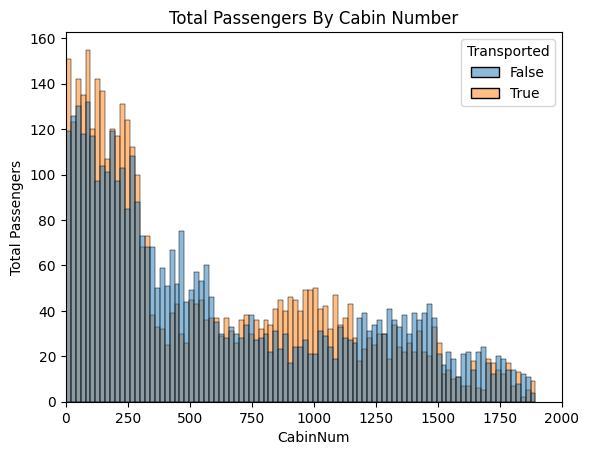

In [264]:
# add histogram for CabinNum
sns.histplot(data=space_train, x='CabinNum', hue='Transported',binwidth=20)
plt.title('Total Passengers By Cabin Number')
plt.ylabel('Total Passengers')
plt.xlim([0,2000])
plt.show()

The earlier cabin numbers accommodate more passengers, compared to the later cabin numbers.

#### Passenger Group
Extract passenger group and group size from PassengerId.

In [265]:
# New feature - Group
space_train['Group'] = space_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
space_test['Group'] = space_test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
space_train['GroupSize']=space_train['Group'].map(lambda x: pd.concat([space_train['Group'], space_test['Group']]).value_counts()[x])
space_test['GroupSize']=space_test['Group'].map(lambda x: pd.concat([space_train['Group'], space_test['Group']]).value_counts()[x])

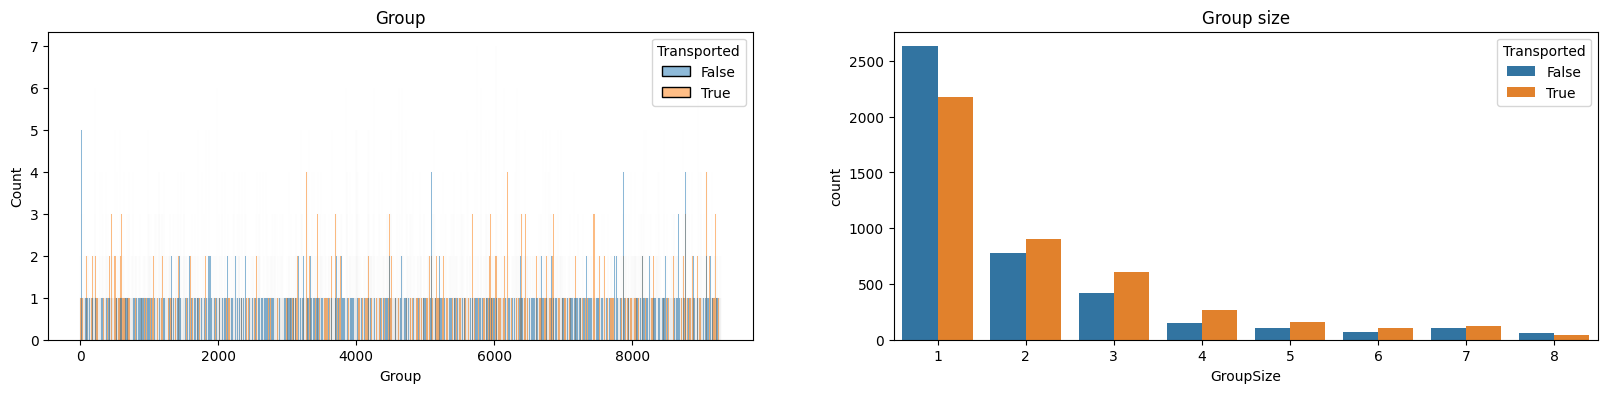

In [266]:
# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=space_train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=space_train, x='GroupSize', hue='Transported')
plt.title('Group size')
fig.tight_layout()

#### Solo

In [267]:
# New feature
space_train['Solo']=(space_train['GroupSize']==1).astype(int)
space_test['Solo']=(space_test['GroupSize']==1).astype(int)

(0.0, 3000.0)

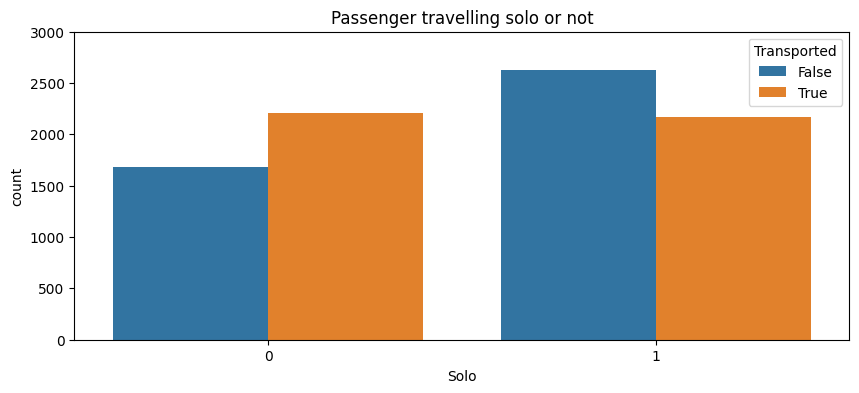

In [268]:
# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=space_train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

# 5. Data Cleaning


The easiest way to deal with missing values is to just use the median for continuous features and the mode for categorical features. This will work 'well enough' but if we want to maximise the accuracy of our models then we need to look for patterns within the missing data. The way to do this is by looking at the joint distribution of features, e.g. do passengers from the same group tend to come from the same family? 

Note: This section is done in reference of the notebook 'Spaceship Titanic: A complete guide' by Samuel Cortinhas on Kaggle. It was a huge help in understanding the different ways to handle missing values.

In [272]:
# combine training and test data
# labels and features
y=space_train['Transported'].copy().astype(int)
X=space_train.drop('Transported', axis=1).copy()

# concatenate dataframes
data=pd.concat([X, space_test], axis=0).reset_index(drop=True)

This will make it easier to fill missing values. We will split it back later.

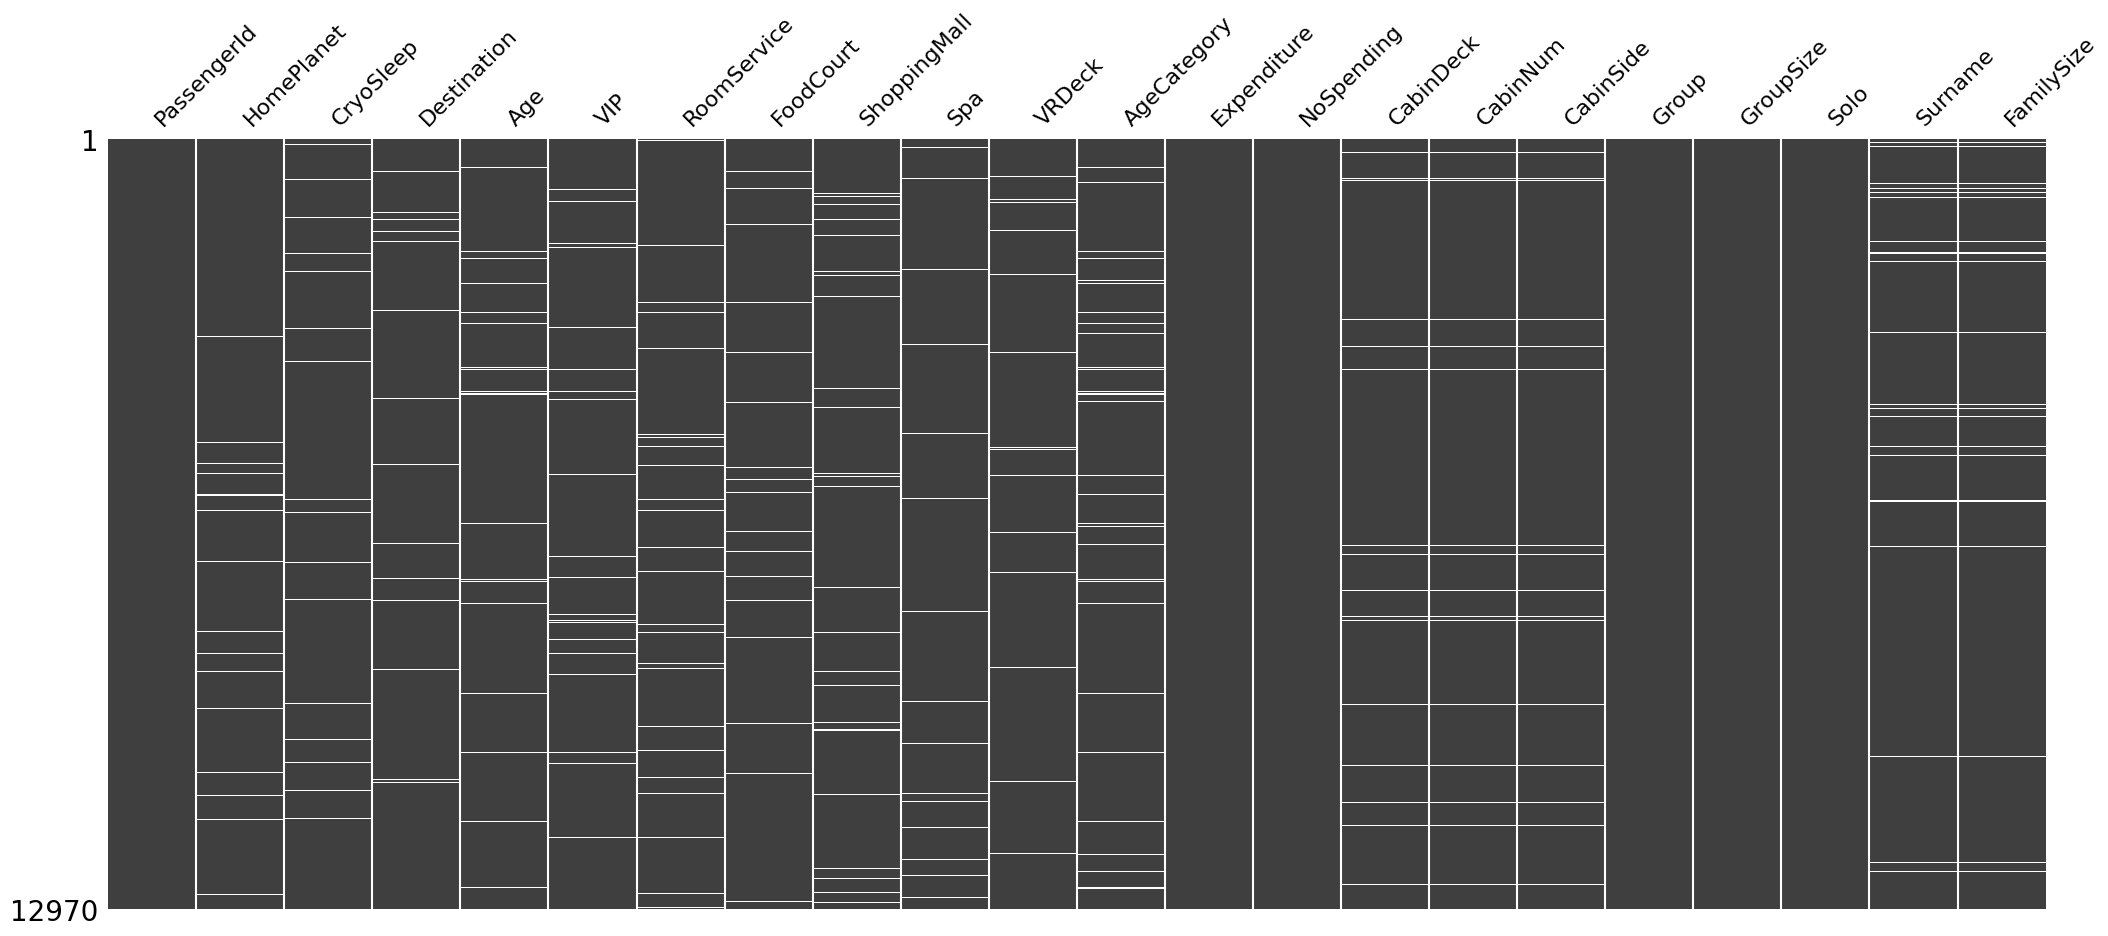

In [273]:
import missingno as msno

msno.matrix(data, sparkline=False)
plt.show()

#### HomePlanet and CabinDeck

<Axes: xlabel='CabinDeck', ylabel='HomePlanet'>

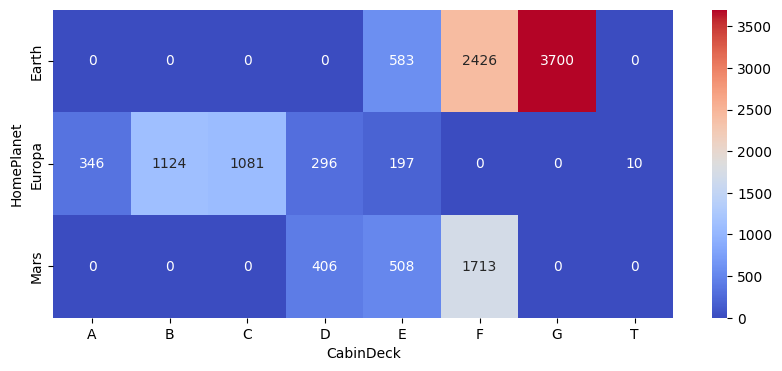

In [231]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=data.groupby(['CabinDeck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

- Passengers on decks A, B, C or T came from Europa.
- Passengers on deck G came from Earth.
- Passengers on decks D, E or F came from multiple planets.

In [274]:
# impute the missing values according to the insight

# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 160


#### HomePlanet and Destination

<Axes: xlabel='HomePlanet', ylabel='Destination'>

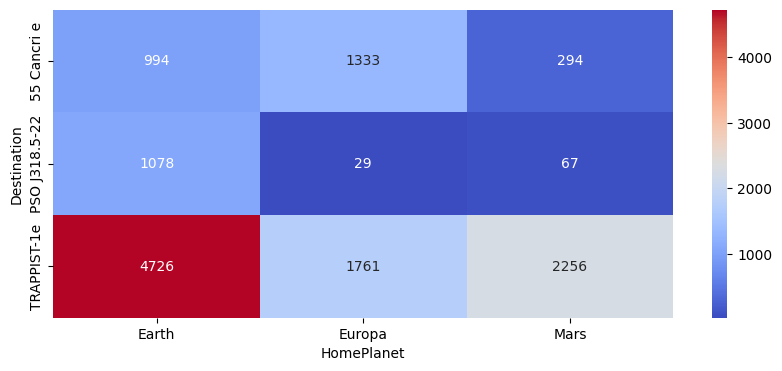

In [233]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading towards TRAPPIST-1e came from Earth. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [275]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['CabinDeck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 160
#HomePlanet missing values after: 0


#### Destination
Since the majority (68%) of passengers are heading towards TRAPPIST-1e (see EDA section), we'll just impute this value (i.e. the mode).

In [276]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


#### CabinDeck and HomePlanet


In [298]:
# Joint distribution
data.groupby(['HomePlanet','Destination','Solo','CabinDeck'])['CabinDeck'].size().unstack().fillna(0)

CabinDeck                        A    B    C    D    E     F     G  T
HomePlanet Destination   Solo                                        
Earth      55 Cancri e   0       0    0    0    0   21    89   264  0
                         1       0    0    0    0   50   292   269  0
           PSO J318.5-22 0       0    0    0    0   17    65   227  0
                         1       0    0    0    0   26   263   466  0
           TRAPPIST-1e   0       0    0    0    0  138   454  1046  0
                         1       0    0    0    0  366  1363  1509  0
Europa     55 Cancri e   0      90  366  306   56   33     0     0  2
                         1      67  141  159   43   32     0     0  0
           PSO J318.5-22 0       2    5   10    0    0     0     0  0
                         1       0    0   10    0    0     0     0  0
           TRAPPIST-1e   0     151  450  416  115   52     0     0  1
                         1      44  179  201   82   80     0     0  8
Mars       55 Cancri e   0       0    0    0   33   15   102     0  0
                         1       0    0    0   43   15    89     0  0
           PSO J318.5-22 0       0    0    0    8    9    14     0  0
                         1       0    0    0    9    6    20     0  0
           TRAPPIST-1e   0       0    0    0  165  206   758     0  0
                         1       0    0    0  166  257   730     0  0

- Passengers from Mars are most likely in deck F.
- Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
- Passengers from Earth are (more or less) most likely in deck G.

We will fill in missing values according to where the mode appears in these subgroups.

In [299]:
# Missing values before
CD_bef=data['CabinDeck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['CabinDeck'].isna(),'CabinDeck'].index
data.loc[data['CabinDeck'].isna(),'CabinDeck']=data.groupby(['HomePlanet','Destination','Solo'])['CabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['CabinDeck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 0


#### CabinNum and CabinDeck

Text(0.5, 1.0, 'Cabin_number vs group coloured by group')

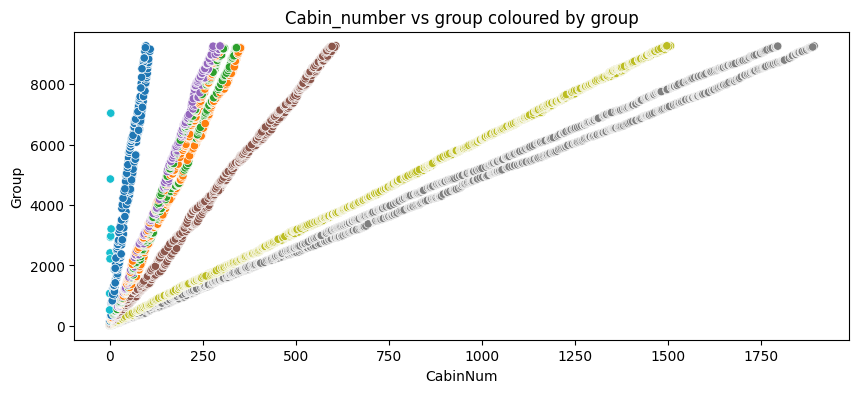

In [300]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# Scatterplot
plt.figure(figsize=(10,4))
sns.scatterplot(x=data['CabinNum'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['CabinNum'].isna(),'CabinDeck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')

There is an interesting pattern here. The CabinNum and Group Num share a linear relationship on a deck by deck basis. We can therefore extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
# Missing values before
CN_bef=data['CabinNum'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['F', 'G']: #?????????
    # Features and labels
    X_CN=data.loc[~(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'Group']
    y_CN=data.loc[~(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'CabinNum']
    X_test_CN=data.loc[(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'Group']

    # Linear regression
    model_CN=LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['CabinNum'].isna()) & (data['CabinDeck']==deck),'CabinNum']=preds_CN.astype(int)

# Print number of missing values left
print('#CabinNum missing values before:',CN_bef)
print('#CabinNum missing values after:',data['CabinNum'].isna().sum())

#CabinNum missing values before: 220
#CabinNum missing values after: 0


#### VIP
VIP is a highly unbalanced binary feature so we will just impute the mode.

In [334]:
# Missing values before
V_bef=data['VIP'].isna().sum()

# Fill missing values with mode
data.loc[data['VIP'].isna(),'VIP']='False'

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


#### Age
Age varies across many features like HomePlanet, Destination, cabin side, and cabin deck, so we will impute missing values according to the median of these subgroups.

In [237]:
# Joint distribution
data.groupby(['HomePlanet','Destination', 'NoSpending', 'CabinSide', 'CabinDeck'])['Age'].median().unstack().fillna(0)

CabinDeck                                         A     B     C     D     E  \
HomePlanet Destination   NoSpending CabinSide                                 
Earth      55 Cancri e   0          P           0.0   0.0   0.0   0.0  26.0   
                                    S           0.0   0.0   0.0   0.0  29.5   
                         1          P           0.0   0.0   0.0   0.0  24.0   
                                    S           0.0   0.0   0.0   0.0  29.0   
           PSO J318.5-22 0          P           0.0   0.0   0.0   0.0  26.0   
                                    S           0.0   0.0   0.0   0.0  31.0   
                         1          P           0.0   0.0   0.0   0.0   2.0   
                                    S           0.0   0.0   0.0   0.0  14.0   
           TRAPPIST-1e   0          P           0.0   0.0   0.0   0.0  24.0   
                                    S           0.0   0.0   0.0   0.0  25.0   
                         1          P           0.0   0.0   0.0   0.0  21.0   
                                    S           0.0   0.0   0.0   0.0   8.0   
Europa     55 Cancri e   0          P          34.0  35.0  34.0  30.5  43.0   
                                    S          37.0  32.5  36.0  36.0  36.0   
                         1          P          39.0  28.5  31.0  24.0  34.0   
                                    S          28.0  30.0  31.0  28.5  30.5   
           PSO J318.5-22 0          P           0.0  36.0  29.0   0.0   0.0   
                                    S          25.0   0.0  38.0   0.0   0.0   
                         1          P           0.0  26.0  33.5   0.0   0.0   
                                    S          30.0  29.0  34.0   0.0   0.0   
           TRAPPIST-1e   0          P          35.5  36.0  34.0  32.5  32.0   
                                    S          33.0  35.0  33.0  34.5  33.0   
                         1          P          28.5  29.0  29.0  33.0  29.0   
                                    S          30.0  30.0  32.0  31.0  29.5   
Mars       55 Cancri e   0          P           0.0   0.0   0.0  26.0  21.5   
                                    S           0.0   0.0   0.0  28.5  23.5   
                         1          P           0.0   0.0   0.0  33.0  25.5   
                                    S           0.0   0.0   0.0  27.5  28.5   
           PSO J318.5-22 0          P           0.0   0.0   0.0  34.0  30.0   
                                    S           0.0   0.0   0.0  35.5  34.0   
                         1          P           0.0   0.0   0.0   0.0  45.0   
                                    S           0.0   0.0   0.0   0.0  47.0   
           TRAPPIST-1e   0          P           0.0   0.0   0.0  29.0  28.0   
                                    S           0.0   0.0   0.0  33.0  30.0   
                         1          P           0.0   0.0   0.0  36.0  26.5   
                                    S           0.0   0.0   0.0  29.0  28.0   

CabinDeck                                         F     G     T  
HomePlanet Destination   NoSpending CabinSide                    
Earth      55 Cancri e   0          P          23.0  26.5   0.0  
                                    S          24.0  23.0   0.0  
                         1          P          23.0  14.0   0.0  
                                    S          23.5  14.0   0.0  
           PSO J318.5-22 0          P          24.0  28.0   0.0  
                                    S          24.0  27.0   0.0  
                         1          P          35.5  22.0   0.0  
                                    S          22.5  20.0   0.0  
           TRAPPIST-1e   0          P          24.0  27.0   0.0  
                                    S          25.0  27.0   0.0  
                         1          P          18.5  19.0   0.0  
                                    S          23.0  18.0   0.0  
Europa     55 Cancri e   0          P           0.0   0.0   0.0  
       

In [335]:
# Missing values before
A_bef=data[['HomePlanet','Destination', 'NoSpending', 'CabinSide', 'CabinDeck']].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','Destination', 'NoSpending', 'CabinSide', 'CabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 299
#Age missing values after: 5


In [343]:
# Update age group feature
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
data['AgeCategory'] = pd.cut(data['Age'], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=labels)

#### CryoSleep
The best way to predict if a passenger is in CryoSleep or not is to see if they spent anything.

In [240]:
# Joint distribution
data.groupby(['NoSpending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
NoSpending,,
0,7339,0
1,740,4581


In [336]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['NoSpending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


#### Expenditure and CryoSleep
This one makes a lot of sense. We don't expect people in CryoSleep to be able to spend anything.

In [ ]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']=='True',exp_features].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [337]:
# Missing values before
E_bef=data[exp_features].isna().sum().sum()

# CryoSleep has no expenditure
for col in exp_features:
    data.loc[(data[col].isna()) & (data['CryoSleep']=='True'), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_features].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


#### Expenditure and others

In [339]:
# Joint distribution
data.groupby(['HomePlanet','Solo','AgeCategory'])['Expenditure'].mean().unstack().fillna(0)

AgeCategory             0-17        18-25        26-34        35-44  \
HomePlanet Solo                                                       
Earth      0      203.823961   785.537453   846.274691   728.446565   
           1      604.040453   785.834578   789.939675   802.919942   
Europa     0      869.048309  2642.794667  3944.485531  3918.941441   
           1        0.000000  2536.121951  3752.655440  4233.342657   
Mars       0      472.992620  1226.461988  1170.007519  1205.333333   
           1     1391.333333  1078.649077  1137.409794  1162.251938   

AgeCategory            45-54        55-64          65+  
HomePlanet Solo                                         
Earth      0      701.816000   757.805970   940.684211  
           1      849.386628   805.536842   887.238095  
Europa     0     3518.209205  3130.000000  4025.800000  
           1     3591.936620  3827.121951  4731.045455  
Mars       0     1005.283019  1597.245283  2083.235294  
           1     1027.608392  1022.777778  1339.076923

In [341]:
# Missing values before
E_bef=data[exp_features].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_features:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','AgeCategory'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_features].isna().sum().sum())

#Expenditure missing values before: 866
#Expenditure missing values after: 24


In [344]:
data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               5
VIP               0
RoomService       1
FoodCourt         3
ShoppingMall      8
Spa               3
VRDeck            9
AgeCategory     265
Expenditure       0
NoSpending        0
CabinDeck         0
CabinNum          0
CabinSide       299
Group             0
GroupSize         0
Solo              0
Surname         155
FamilySize        0
dtype: int64

# 6. Preprocessing

#### Numerical Features (Log Transformation)

In [345]:
# apply log transformation for highly skewed features
features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for column in features:
    # it is good practice to create new columns for the transformed ones in case we make a mistake
    space_train[f'log_{column}']=np.log(1+space_train[column])
    space_test[f'log_{column}']=np.log(1+space_test[column])

In [346]:
space_train.groupby(['HomePlanet'])[['log_RoomService','log_FoodCourt','log_ShoppingMall','log_Spa','log_VRDeck']].mean()

,log_RoomService,log_FoodCourt,log_ShoppingMall,log_Spa,log_VRDeck
HomePlanet,,,,,
Earth,1.641397,1.658672,1.656742,1.668742,1.689540
Europa,0.788588,3.641248,0.805183,2.875162,2.942626
Mars,3.319778,0.673650,2.614630,1.243867,0.685847


- Passengers from Mars exhibit the highest average spending on Room Service, followed by those from Earth and Europa.
- Passengers from Europa exhibit the highest average spending on Food Court, followed by those from Earth and Mars.
- Passengers from Mars exhibit the highest average spending on Shopping Mall, followed by those from Earth and Europa.
- Passengers from Europa exhibit the highest average spending on Spa, followed by those from Earth and Mars.
- Passengers from Europa exhibit the highest average spending on VR Deck, followed by those from Earth and Mars.

Here, we can see that passengers from Europa exhibit the highest average spending compared to passengers from other planets.

#### Transported (Target Variable) (Label Encoding)

In [ ]:
# apply label encoding for categorical feature
space_train['Transported'] = space_train['Transported'].astype(int)

In [ ]:
# drop irrelevant columns
# space_train.drop(columns=["PassengerId", "Name", "Cabin"], inplace=True)
# space_test.drop(columns=["PassengerId", "Name", "Cabin"], inplace=True)